In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

pd.options.mode.chained_assignment = None

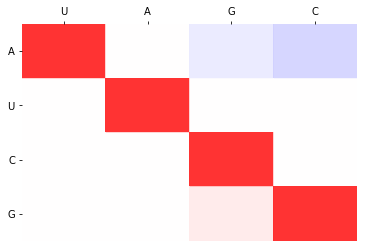

In [2]:
def plot_heatmap(ax, data, xlabels, ylabels, vmin, vmax):
    heatmap = ax.pcolor(data, cmap=plt.cm.bwr, vmin=vmin, vmax=vmax, alpha=0.8)
    
    ax.set_frame_on(False)
    
    ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
    
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    
    ax.set_xticklabels(xlabels, minor=False)
    ax.set_yticklabels(ylabels, minor=False)
    
    ax.grid(False)

ax = plt.subplot(111)
plot_heatmap(ax, np.array([[1,0,-0.1,-0.2],
                       [0,1,0,0],
                       [0,0,1,0],
                       [0,0,0.1,1]]),
             ['U','A','G','C'],
             ['A','U','C','G'], -1, 1)

In [14]:
tf.reset_default_graph()
sess = tf.InteractiveSession()
model1 = tf.train.import_meta_graph('../logdirs/rbns/my-model-61000.meta')
model1.restore(sess, tf.train.latest_checkpoint('../logdirs/rbns/'))


(4, 4, 1, 4)
(4, 4, 1)


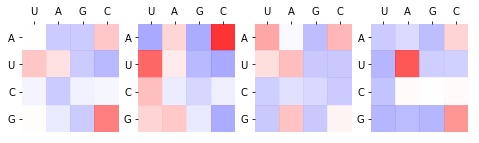

In [15]:
conv_weights = tf.get_collection('weight', scope='conv4x4')[0]
conv_weights = sess.run(conv_weights)
dim_output = conv_weights.shape[-1]
cols = 4
rows = np.ceil(dim_output/cols)
print(conv_weights.shape)
print(conv_weights[:,:,:,0].shape)
bounds = np.max(np.abs(conv_weights))
fig = plt.figure(figsize=(cols*2, rows*2))
for i in range(dim_output):
    v = conv_weights[:,:,:,i].reshape(4,4)
    ax = plt.subplot(rows, cols, i+1)
    plot_heatmap(ax, v,
                 ['U','A','G','C'],
                 ['A','U','C','G'],
                 -1* bounds, bounds)


(4, 4, 4, 4)


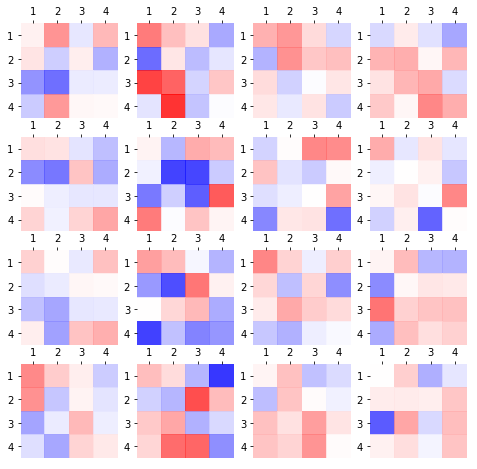

In [16]:
conv_weights = tf.get_collection('weight', scope='convlayer2')[0]
conv_weights = sess.run(conv_weights)
print(conv_weights.shape)
dim_output = conv_weights.shape[-1]
dim_conv = conv_weights.shape[0]
cols = dim_output
rows = conv_weights.shape[-2]
# print(conv_weights.shape)
# print(conv_weights[:,:,:,0].shape)
bounds = np.max(np.abs(conv_weights))
fig = plt.figure(figsize=(cols*2, rows*2))
for i in range(rows):
    for j in range(cols):
        v = conv_weights[:,:,i,j].reshape(dim_conv,dim_conv)
        ax = plt.subplot(rows, cols, (i*cols) + j +1)
        plot_heatmap(ax, v,
                     ['1','2','3','4'],
                     ['1','2','3','4'],
                     -1* bounds, bounds)


In [10]:
conv_weights = tf.get_collection('weight', scope='fullyconnected1')[0]
conv_weights = sess.run(conv_weights)
print(conv_weights.shape)


(4224, 64)


In [13]:
full1 = tf.get_collection('weight', scope='fullyconnected1')
full1 = sess.run(full1)[0]
print(full1)
# print(min(full1), max(full1))
# print(full1.shape)
# print(np.max(full1), np.min(full1))
# inchannels = 4
# # dim = int(np.sqrt(inchannels))
# dim = 4
# len_seq = 12
# xs = (np.array([range(dim) for x in range(dim)])/dim).flatten()[:inchannels]
# ys = (np.array([[x]*dim for x in range(dim)])/dim).flatten()[:inchannels]
# fig = plt.figure(figsize=(10,10))
# ax = plt.subplot(1,1,1)
# ax.set_xticks(np.arange(0,len_seq,1)-0.125)
# ax.set_yticks(np.arange(0,len_seq,1)-0.125)
# ax.invert_yaxis()
# limit = np.max(np.abs(full1))
# print(limit)
# for i in range(full1.shape[1]):
#     weights = full1[:,i]
#     for j in range(len(weights)):
#         row = int(j/len_seq)
#         col = j % len_seq
#         block = weights[j*inchannels: (j+1)*inchannels]
#         plt.scatter(xs+col, ys+row, c=block, cmap=plt.cm.bwr, vmin=-1*limit, vmax=1*limit)
#     break
# plt.grid()
# plt.xlim(-0.125,len_seq)
# plt.ylim(len_seq, -0.125)

[[-0.10044491 -0.08403755]
 [ 0.11491098 -0.10702559]
 [ 0.2252806   0.09593461]
 ..., 
 [-0.08217334  0.07371675]
 [-0.00453379  0.09899551]
 [ 0.0964912   0.0746916 ]]


In [22]:
blah = np.array([[[[1.1,1.2],[2.1,2.2]],[[3.1,3.2],[4.1,4.2]]],
                 [[[5.1,5.2],[6.1,6.2]],[[7.1,7.2],[8.1,8.2]]],[[[9.1,9.2],[10.1,10.2]],[[11.1,11.2],[12.1,12.2]]]])
print(blah, blah.shape)
print(blah.reshape(3,8))

[[[[  1.1   1.2]
   [  2.1   2.2]]

  [[  3.1   3.2]
   [  4.1   4.2]]]


 [[[  5.1   5.2]
   [  6.1   6.2]]

  [[  7.1   7.2]
   [  8.1   8.2]]]


 [[[  9.1   9.2]
   [ 10.1  10.2]]

  [[ 11.1  11.2]
   [ 12.1  12.2]]]] (3, 2, 2, 2)
[[  1.1   1.2   2.1   2.2   3.1   3.2   4.1   4.2]
 [  5.1   5.2   6.1   6.2   7.1   7.2   8.1   8.2]
 [  9.1   9.2  10.1  10.2  11.1  11.2  12.1  12.2]]


(1920, 16)
[-0.0183767  -0.03258734  0.01315666 ..., -0.1054382  -0.16003661  0.014898  ]


ValueError: Invalid RGBA argument: 0.0042644041

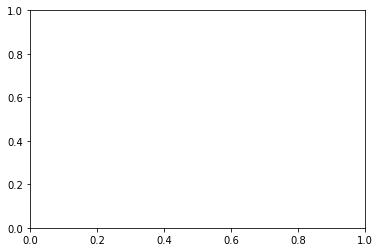

In [43]:
full1 = tf.get_collection('weight', scope='fullyconnected1')
full1 = sess.run(full1)[0]
print(full1.shape)

for i in range(full1.shape[1]):
    col = full1[:,i]
    print(col)
    xs, ys = [], []
    for j in range(20):
        xs += list(range(24))
    for j in range(20):
        ys += [j]*24

    plt.scatter(xs, ys, c=np.random.randint(10, size=1920), cmap='bwr')
    break
#fig = plt.figure(figsize=(full1.shape[1], full1.shape[0]))
#ax = plt.subplot(111)
#plot_heatmap(ax, full1, range(full1.shape[1]), range(full1.shape[0]))